In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Dataset path in Kaggle
dataset_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"

# Class labels (0 to 42) based on folder structure
CLASS_FOLDERS = [str(i) for i in range(43)]

# Function to load images from the Train directory
def load_images(base_path):
    images = []
    labels = []

    for class_id in CLASS_FOLDERS:
        class_folder = os.path.join(base_path, class_id)  # e.g., /Train/0, /Train/1 ...
        
        if not os.path.exists(class_folder):
            print(f"Warning: Class folder {class_folder} does not exist. Skipping...")
            continue  # Skip if the folder does not exist
        
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Could not read {img_path}")
                continue  # Skip unreadable images
            
            img = cv2.resize(img, (30, 30))  # Resize to 32x32
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            
            images.append(img)
            labels.append(int(class_id))  # Store class as integer
    
    return np.array(images), np.array(labels)

# Load training images
train_images, train_labels = load_images(dataset_path)

# Convert labels to categorical
num_classes = len(CLASS_FOLDERS)
train_labels = keras.utils.to_categorical(train_labels, num_classes)

# Split dataset into train & validation
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(43, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
input_shape = (30, 30, 3)
model = create_cnn_model(input_shape, num_classes)
model.summary()

history = model.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val), batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 43)                  │         269,739 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,635 (1.03 MB)

 Trainable params: 270,635 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5420 - loss: 10.3955 - val_accuracy: 0.8865 - val_loss: 0.5299
Epoch 2/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9248 - loss: 0.3266 - val_accuracy: 0.8973 - val_loss: 0.5251
Epoch 3/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9419 - loss: 0.2585 - val_accuracy: 0.9223 - val_loss: 0.4801
Epoch 4/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9487 - loss: 0.2320 - val_accuracy: 0.9333 - val_loss: 0.4310
Epoch 5/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9475 - loss: 0.2409 - val_accuracy: 0.9351 - val_loss: 0.4750
Epoch 6/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9643 - loss: 0.1706 - val_accuracy: 0.9081 - val_loss: 0.7475
Epoch 7/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9611 - loss: 0.1859 - val_accuracy: 0.9258 - val_loss: 0.6634
Epoch 8/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9599 - loss: 0.2270 -

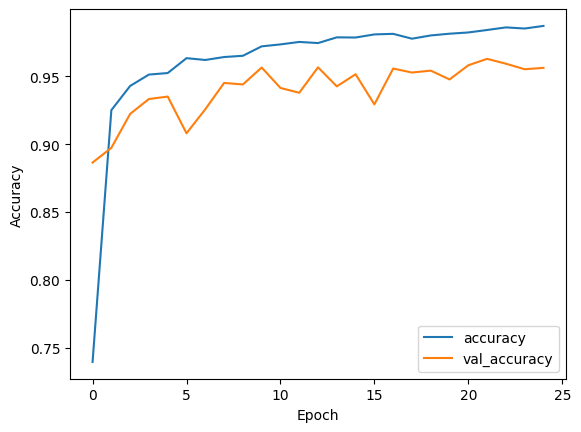

In [3]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [4]:
# Save the model
model.save("cnn_model_pbl_major.h5")

print("✅ Model training complete and saved as 'cnn_model_pbl_major.h5'")

✅ Model training complete and saved as 'cnn_model_pbl_major.h5'


In [5]:
# Load the model from .h5
loaded_model = keras.models.load_model('/kaggle/working/cnn_model_pbl_major.h5')
# Check the model architecture
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 43)                  │         269,739 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,637 (1.03 MB)

 Trainable params: 270,635 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [6]:
model = loaded_model

In [31]:
import cv2
import numpy as np

# Load the image using OpenCV
image_path = '/kaggle/input/gtsrb-german-traffic-sign/Train/15/00015_00000_00003.png'  # Replace with your image path
image = cv2.imread(image_path)

In [32]:
# Resize image to 30x30
resized_image = cv2.resize(image, (30, 30))

# Convert to 8-bit integer array
image_array = np.array(resized_image, dtype=np.uint8)

# Prepare to format as a C array
c_array_string = "{\n"

# Convert each pixel to C array format
for i, row in enumerate(image_array):
    c_array_string += "    {"
    for j, pixel in enumerate(row):
        c_array_string += f"{{{pixel[0]}, {pixel[1]}, {pixel[2]}}}"
        if j < len(row) - 1:
            c_array_string += ", "
    c_array_string += "}"
    if i < len(image_array) - 1:
        c_array_string += ",\n"
c_array_string += "\n};"
print("Sr.no. 0 image")
print(c_array_string)

Sr.no. 0 image
{
    {{236, 240, 255}, {230, 231, 255}, {119, 125, 169}, {71, 77, 95}, {42, 45, 50}, {28, 29, 28}, {23, 23, 26}, {24, 23, 26}, {23, 22, 25}, {24, 21, 25}, {24, 21, 25}, {26, 22, 26}, {31, 26, 27}, {31, 27, 28}, {32, 27, 29}, {30, 26, 28}, {31, 26, 28}, {29, 25, 27}, {29, 24, 25}, {27, 24, 24}, {26, 25, 25}, {26, 25, 26}, {29, 28, 29}, {32, 30, 34}, {36, 31, 35}, {43, 36, 37}, {48, 41, 41}, {52, 46, 46}, {64, 52, 54}, {108, 79, 49}},
    {{235, 238, 255}, {233, 235, 255}, {119, 126, 165}, {63, 70, 89}, {27, 32, 41}, {25, 24, 27}, {25, 22, 26}, {23, 21, 24}, {23, 21, 24}, {24, 21, 25}, {24, 21, 25}, {25, 21, 25}, {31, 25, 27}, {36, 29, 29}, {37, 30, 30}, {36, 30, 29}, {36, 29, 28}, {35, 29, 29}, {34, 29, 29}, {32, 29, 29}, {28, 27, 27}, {28, 26, 27}, {30, 28, 30}, {33, 31, 34}, {36, 30, 34}, {43, 35, 37}, {48, 40, 40}, {51, 46, 47}, {62, 52, 56}, {104, 80, 51}},
    {{242, 241, 255}, {237, 239, 255}, {123, 132, 164}, {57, 62, 80}, {28, 28, 37}, {26, 24, 28}, {25, 23, 26},

In [35]:
from PIL import Image
# Provide the image path manually (change this path every time)

# Load and process the image
image = Image.open(image_path).convert("RGB")  # Open image
image = image.resize((30, 30))  # Resize to 30x30  
image = np.expand_dims(image, axis=0)  # Add batch dimension (1, 30, 30, 3)

# Make prediction
prediction = loaded_model.predict(image)
predicted_class = np.argmax(prediction)  # Get class index

print(f"🔹0th Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
🔹0th Prediction: 15


In [18]:
import csv
# Extract weights and biases
weights_dict = {}
for layer in model.layers:
    if len(layer.get_weights()) > 0:  # Only layers with weights
        weights, biases = layer.get_weights()
        weights_dict[layer.name + "_weights"] = weights
        weights_dict[layer.name + "_biases"] = biases

# Save to CSV
csv_filename = "cnn_weights.csv"
with open(csv_filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    
    # Write headers
    headers = list(weights_dict.keys())
    writer.writerow(headers)
    
    # Write rows (pad shorter lists with empty values)
    max_len = max(len(v.flatten()) for v in weights_dict.values())
    for i in range(max_len):
        row = [weights_dict[key].flatten()[i] if i < len(weights_dict[key].flatten()) else "" for key in headers]
        writer.writerow(row)

print(f"Weights saved to {csv_filename}")

# Convert weights to C array with proper shape
c_array_filename = "cnn_weights.h"
with open(c_array_filename, "w") as f:
    f.write("#ifndef CNN_WEIGHTS_H\n#define CNN_WEIGHTS_H\n\n")
    for i, (layer_name, w) in enumerate(weights_dict.items()):
        shape_str = " ".join(map(str, w.shape))
        shape_c = "".join([f"[{dim}]" for dim in w.shape])
        f.write(f"// {layer_name} weights, shape: {shape_str}\n")
        f.write(f"const float {layer_name}{shape_c} = {{\n")
        f.write(",\n".join(
            ["{ " + ", ".join(map(str, row.flatten())) + " }" for row in w.reshape(-1, w.shape[-1])]
        ))
        f.write("\n};\n\n")
    f.write("#endif // CNN_WEIGHTS_H\n")

print(f"C array saved to {c_array_filename}")

Weights saved to cnn_weights.csv
C array saved to cnn_weights.h


In [11]:
import numpy as np

# Get the weights
weights = model.get_weights()

# Convert to float16 (simulated reduced precision)
quantized_weights = [w.astype(np.float16) for w in weights]

# Print the quantized weights
for i, w in enumerate(quantized_weights):
    print(f"Layer {i + 1} weights shape: {w.shape}, dtype: {w.dtype}")
    print(w)


Layer 1 weights shape: (3, 3, 3, 32), dtype: float16
[[[[ 1.1023e-01 -1.0309e-01 -8.3984e-02 -7.2861e-03 -8.9188e-03
    -9.7885e-03 -2.0947e-01  6.7749e-02  1.2718e-02 -8.4473e-02
    -4.5776e-02 -1.0480e-01 -1.1334e-01 -6.5002e-02 -6.9092e-02
     6.9214e-02 -6.3782e-02  2.8491e-01 -1.3745e-01  7.8430e-02
     8.0933e-02 -2.5903e-01 -2.9810e-01 -2.5122e-01 -4.9286e-02
     2.8473e-02 -6.0730e-02 -1.7358e-01  7.8154e-04  5.4657e-02
    -1.8567e-01  1.1520e-03]
   [-1.5332e-01 -1.9577e-02 -1.5198e-01 -6.4270e-02 -4.3793e-02
    -4.6051e-02 -2.2205e-01  2.9846e-02 -5.5267e-02 -1.0980e-01
     3.5065e-02 -2.5528e-02 -1.7224e-01 -1.0419e-01  6.1676e-02
    -8.3374e-02 -5.8075e-02  1.5588e-01  1.0468e-01 -9.3506e-02
    -2.3727e-02 -5.7281e-02 -7.9575e-03 -1.6809e-01 -2.9449e-02
     5.5878e-02  3.6354e-03 -1.9861e-01  1.7114e-01  1.2671e-01
    -5.0598e-02 -4.5135e-02]
   [-4.7394e-02 -1.4807e-01  1.7975e-02 -1.4282e-01 -1.1482e-02
    -1.1572e-01  3.7720e-02 -1.8970e-01 -1.5710e-01 -6.89

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import cv2

image = cv2.imread(image_path)  # Load image
image = cv2.resize(image, (30, 30))   # Force resize to (30, 30)
#image = image / 255.0                 # Normalize
image = np.expand_dims(image, axis=0) # Add batch dimension

print("Final input shape:", image.shape)  # Debugging


# Create a new model to extract layer outputs
layer_outputs = [layer.output for layer in loaded_model.layers]
intermediate_model = Model(inputs=loaded_model.layers[0].input, outputs=layer_outputs)  # FIXED

# Run inference
intermediate_outputs = intermediate_model.predict(image)

# Print layer-wise outputs
for i, layer_output in enumerate(intermediate_outputs):
    print(f"\nLayer {i} ({loaded_model.layers[i].name}) output:\n", layer_output.flatten()[:10])  # Print first 10 values

Final input shape: (1, 30, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step

Layer 0 (conv2d) output:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Layer 1 (max_pooling2d) output:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Layer 2 (flatten) output:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Layer 3 (dense) output:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
import pandas as pd
# Get layer outputs
intermediate_outputs = intermediate_model.predict(image)

# Save layer-wise outputs to CSV files
for i, layer_output in enumerate(intermediate_outputs):
    layer_name = loaded_model.layers[i].name
    output_flat = layer_output.flatten()  # Flatten for comparison
    pd.DataFrame(output_flat).to_csv(f"python_{layer_name}.csv", index=False, header=False)
    print(f"Saved: python_{layer_name}.csv")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Saved: python_conv2d.csv
Saved: python_max_pooling2d.csv
Saved: python_flatten.csv
Saved: python_dense.csv


In [26]:
import csv
# Extract weights and biases
weights_dict = {}
for layer in model.layers:
    if len(layer.get_weights()) > 0:  # Only layers with weights
        weights, biases = layer.get_weights()
        weights_dict[layer.name + "_weights"] = weights.astype(np.float16)
        weights_dict[layer.name + "_biases"] = biases.astype(np.float16)

# Save to CSV
csv_filename = "cnn_weights_16bits.csv"
with open(csv_filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    
    # Write headers
    headers = list(weights_dict.keys())
    writer.writerow(headers)
    
    # Write rows (pad shorter lists with empty values)
    max_len = max(len(v.flatten()) for v in weights_dict.values())
    for i in range(max_len):
        row = [weights_dict[key].flatten()[i] if i < len(weights_dict[key].flatten()) else "" for key in headers]
        writer.writerow(row)

print(f"Weights saved to {csv_filename}")

# Convert weights to C array with proper shape
c_array_filename = "cnn_weights_16bits.h"
with open(c_array_filename, "w") as f:
    f.write("#ifndef CNN_WEIGHTS_H\n#define CNN_WEIGHTS_H\n\n")
    for i, (layer_name, w) in enumerate(weights_dict.items()):
        shape_str = " ".join(map(str, w.shape))
        shape_c = "".join([f"[{dim}]" for dim in w.shape])
        f.write(f"// {layer_name} weights, shape: {shape_str}\n")
        f.write(f"const float {layer_name}{shape_c} = {{\n")
        f.write(",\n".join(
            ["{ " + ", ".join(map(str, row.flatten())) + " }" for row in w.reshape(-1, w.shape[-1])]
        ))
        f.write("\n};\n\n")
    f.write("#endif // CNN_WEIGHTS_H\n")

print(f"C array saved to {c_array_filename}")

Weights saved to cnn_weights_16bits.csv
C array saved to cnn_weights_16bits.h
